In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load dataframes

In [4]:
character_file = r'Dataset\MovieSummaries\character.metadata.tsv'
movie_file = r"Dataset\MovieSummaries\movie.metadata.tsv"
name_clusters_file = r'Dataset\MovieSummaries\name.clusters.txt' 
summaries_file = r'Dataset\MovieSummaries\plot_summaries.txt'
tvtropes_clusters_file = r'Dataset\MovieSummaries\tvtropes.clusters.txt'

## Character dataframe

In [5]:
column_names = [
    "wiki_movie_id",
    "freebase_movie_id",
    "release_date",
    "character_name",
    "actor_birth_date",
    "actor_gender",
    "actor_height_m",
    "actor_ethnicity_id",
    "actor_name",
    "actor_age_at_release",
    "character_actor_map_id",
    "character_id",
    "actor_id"
]
character = pd.read_csv(character_file, delimiter='\t', names = column_names)
character.head()

,wiki_movie_id,freebase_movie_id,release_date,character_name,actor_birth_date,actor_gender,actor_height_m,actor_ethnicity_id,actor_name,actor_age_at_release,character_actor_map_id,character_id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [6]:
character.groupby("actor_name")["character_name"]

(0.0, 30.0)

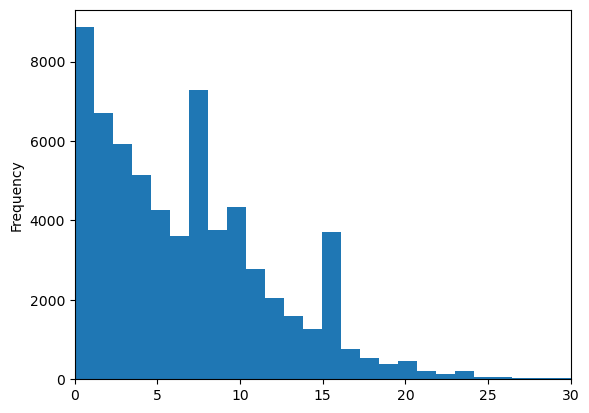

In [7]:
character.groupby("wiki_movie_id")["actor_name"].agg("count").plot.hist(bins=100)
plt.xlim(0,30)

In [8]:
character.freebase_movie_id.unique().size

64330

## Movie dataframe

In [9]:
column_names = ['Wikipedia_movie_ID',
                'Freebase_movie_ID',
                'Movie_name',
                'Movie_release_date',
                'Movie_box_office_revenu', 'Movie_runtime', 'Movie_languages', 'Movie_countries', 'Movie_genres']
movie = pd.read_csv(movie_file, delimiter='\t', names = column_names)
movie['Movie_release_date_datetime']= pd.to_datetime(movie['Movie_release_date'], format='mixed', errors='coerce')
movie['Movie_release_year'] = movie['Movie_release_date_datetime'].dt.strftime('%Y')
movie.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenu,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_release_date_datetime,Movie_release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000-02-16,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988-01-01,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987-01-01,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983-01-01,1983


In [10]:
movie.Freebase_movie_ID.unique().size

81741

## Summaries Dataframe

In [11]:
summaries_movie = pd.read_csv(summaries_file, delimiter='\t', names=['movie_ID', 'movie_summary'])
summaries_movie.head()

,movie_ID,movie_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [12]:
summaries_movie.movie_ID.unique().size

42303

In [13]:
summaries_movie.movie_summary.sample(1)

14530    In 1983, deep within the mysterious Arboria In...
Name: movie_summary, dtype: object

# Names dataframe

In [14]:
name_clusters = pd.read_csv(name_clusters_file, delimiter='\t', names=['character_name', 'instance_code'])
name_clusters.head()

,character_name,instance_code
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [15]:
tvtropes = pd.read_csv(tvtropes_clusters_file, delimiter='\t', names=['character_type', 'instance_ref'])
tvtropes.head()

,character_type,instance_ref
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [16]:
tvtropes['instance_ref'][0]

'{"char": "Professor Philip Brainard", "movie": "Flubber", "id": "/m/0jy9q0", "actor": "Robin Williams"}'

In [17]:
tvtropes

,character_type,instance_ref
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
...,...,...
496,young_gun,"{""char"": ""Morgan Earp"", ""movie"": ""Tombstone"", ..."
497,young_gun,"{""char"": ""Colorado Ryan"", ""movie"": ""Rio Bravo""..."
498,young_gun,"{""char"": ""Tom Sawyer"", ""movie"": ""The League of..."
499,young_gun,"{""char"": ""William H. 'Billy the Kid' Bonney"", ..."


# Search easily for words in text

In [57]:
import re

# Sample DataFrame
my_df = summaries_movie.copy()

# List of words related to "smoking"
related_words = ["addiction", "smoke", "smoker", "smoking", "cigar", "cigarette", "tobacco", "nicotine", "ashtray"]

# Initialize the new columns
my_df['related_to_smoke'] = False
my_df['smoke_terms'] = pd.NA

# Iterate through the DataFrame
for index, row in my_df.iterrows():
    row_summary = row['movie_summary']

    # regular expression to search for related words
    pattern = r"\b(" + "|".join(related_words) + r")\b"

    # Search with regular expression
    matches = re.findall(pattern, row_summary, flags=re.IGNORECASE)

    # Update the DataFrame based on the matches
    if len(matches) > 0:
        my_df.at[index, 'related_to_smoke'] = True
        my_df.at[index, 'smoke_terms'] = ','.join(matches)
        #print(f"Related words found in the text: {matches}")

In [58]:
my_df.head()

,movie_ID,movie_summary,related_to_smoke,smoke_terms
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",False,NaN
1,31186339,The nation of Panem consists of a wealthy Capi...,False,NaN
2,20663735,Poovalli Induchoodan is sentenced for six yea...,False,NaN
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",False,NaN
4,595909,Seventh-day Adventist Church pastor Michael Ch...,False,NaN
...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",False,NaN
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",False,NaN
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,False,NaN
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",False,NaN


In [49]:
id_year = movie[['Wikipedia_movie_ID', 'Movie_release_year']]
id_year

,Wikipedia_movie_ID,Movie_release_year
0,975900,2001
1,3196793,2000
2,28463795,1988
3,9363483,1987
4,261236,1983
...,...,...
81736,35228177,2011
81737,34980460,2011
81738,9971909,1972
81739,913762,1992


In [50]:
my_df = pd.merge(my_df, id_year, how='left', left_on='movie_ID', right_on='Wikipedia_movie_ID')
my_df

,movie_ID,movie_summary,related_to_smoke,smoke_terms,Wikipedia_movie_ID,Movie_release_year
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",False,NaN,23890098.0,1990
1,31186339,The nation of Panem consists of a wealthy Capi...,False,NaN,31186339.0,2012
2,20663735,Poovalli Induchoodan is sentenced for six yea...,False,NaN,20663735.0,2000
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",False,NaN,2231378.0,1951
4,595909,Seventh-day Adventist Church pastor Michael Ch...,False,NaN,595909.0,1988
...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",False,NaN,34808485.0,2012
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",False,NaN,1096473.0,1928
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,False,NaN,35102018.0,2011
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",False,NaN,8628195.0,1961


In [51]:
result = my_df.groupby('Movie_release_year')['related_to_smoke'].agg(['sum', 'count'])

In [52]:
result

,sum,count
Movie_release_year,,
1893,0,1
1894,0,2
1895,0,9
1896,1,6
1897,0,4
...,...,...
2010,40,1374
2011,32,1162
2012,12,662


In [53]:
result['proportion'] = result["sum"]/result["count"]

<Axes: xlabel='Movie_release_year'>

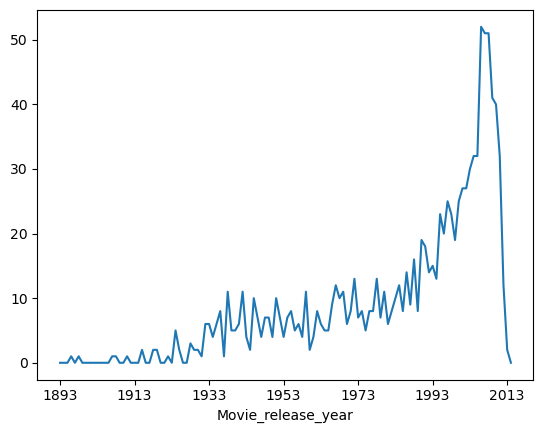

In [54]:
result['sum'].plot()

<Axes: xlabel='Movie_release_year'>

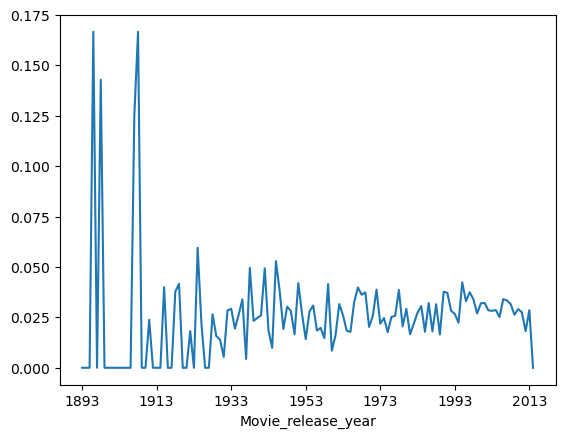

In [55]:
result['proportion'].plot()

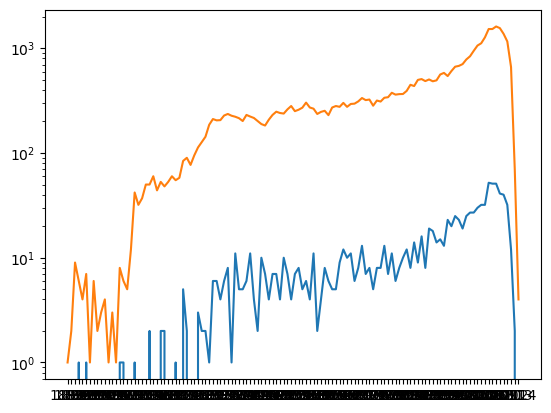

In [56]:
import matplotlib.pyplot as plt

plt.semilogy(result['sum'])
plt.semilogy(result['count'])

In [34]:
result['sum'].values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  2,  0,  0,  2,  1,  0,  0,  0,  0,  1,  2,  0,
        0,  3,  1,  1,  1,  3,  5,  1,  4,  5,  0,  8,  1,  4,  5,  6,  2,
        2,  6,  6,  1,  6,  3,  1,  8,  4,  3,  3,  4,  1,  4,  1,  7,  1,
        4,  4,  1,  3,  2,  7,  7,  5,  7,  2,  6,  8,  3,  4,  1,  2,  3,
        7,  5,  6,  2,  4,  6,  9,  4,  7,  5, 11,  5, 10,  9,  6,  9,  9,
        7, 11, 11, 11, 14, 17, 21, 17, 18, 21, 14, 21, 28, 23, 22, 16, 14,
        4,  0,  0], dtype=int64)

# Try to get a dataframe of ages and box offices revenue of the movie they play in

In [18]:
character

,wiki_movie_id,freebase_movie_id,release_date,character_name,actor_birth_date,actor_gender,actor_height_m,actor_ethnicity_id,actor_name,actor_age_at_release,character_actor_map_id,character_id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [26]:
np.sum(~np.isnan(movie["Movie_box_office_revenu"]))

8401

In [23]:
movie["Movie_box_office_revenu"].count()/movie["Movie_box_office_revenu"].size

0.1027758407653442

In [21]:
movie[["Wikipedia_movie_ID", "Movie_box_office_revenu"]]

,Wikipedia_movie_ID,Movie_box_office_revenu
0,975900,14010832.0
1,3196793,NaN
2,28463795,NaN
3,9363483,NaN
4,261236,NaN
...,...,...
81736,35228177,NaN
81737,34980460,NaN
81738,9971909,NaN
81739,913762,NaN


In [33]:
ratings = pd.read_csv(r"Dataset/IMDB/data.tsv", sep = '\t')

In [65]:
imdb_titles_df = pd.read_csv(r"Dataset/IMDB/title.basics.tsv/data.tsv", sep = '\t')

C:\Users\gezas\AppData\Local\Temp\ipykernel_24256\1892393687.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles_df = pd.read_csv(r"Dataset/IMDB/title.basics.tsv/data.tsv", sep = '\t')


In [36]:
imdb_titles_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10293178,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10293179,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10293180,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10293181,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [50]:
movie.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenu,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_release_date_datetime,Movie_release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000-02-16,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988-01-01,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987-01-01,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983-01-01,1983


In [51]:
imdb_titles_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [43]:
len(movie['Movie_name']), len(imdb_titles_df['originalTitle'])

(81741, 10293183)

In [59]:
clean_imdb_titles = imdb_titles_df[['originalTitle', 'tconst']].drop_duplicates()

In [60]:
imdb_titles_df.shape, clean_imdb_titles.shape

((10293183, 9), (10293183, 2))

In [110]:
movie

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenu,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_release_date_datetime,Movie_release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000-02-16,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988-01-01,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987-01-01,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983-01-01,1983
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011-03-19,2011
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011-01-21,2011
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972-09-22,1972
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992-05-21,1992


In [111]:
result_merge = pd.merge(movie[['Movie_name', 'Movie_box_office_revenu', 'Movie_genres', 'Movie_release_year','Wikipedia_movie_ID']],
                        imdb_titles_df[['originalTitle', 'tconst']],
         how='left', left_on='Movie_name', right_on='originalTitle').copy()

In [112]:
result_merge

,Movie_name,Movie_box_office_revenu,Movie_genres,Movie_release_year,Wikipedia_movie_ID,originalTitle,tconst
0,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900,Ghosts of Mars,tt0228333
1,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900,Ghosts of Mars,tt0594845
2,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900,Ghosts of Mars,tt2450324
3,Getting Away with Murder: The JonBenét Ramsey ...,NaN,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,3196793,NaN,NaN
4,Brun bitter,NaN,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,28463795,Brun bitter,tt0094806
...,...,...,...,...,...,...,...
710274,Another Nice Mess,NaN,"{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9971909,Another Nice Mess,tt0362411
710275,Another Nice Mess,NaN,"{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9971909,Another Nice Mess,tt12114110
710276,The Super Dimension Fortress Macross II: Lover...,NaN,"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,913762,NaN,NaN
710277,Spliced,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...",2002,12476867,Spliced,tt1596561


In [113]:
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2005
1,tt0000002,5.8,269
2,tt0000003,6.5,1907
3,tt0000004,5.5,178
4,tt0000005,6.2,2687
...,...,...,...
1366667,tt9916730,7.6,11
1366668,tt9916766,7.0,22
1366669,tt9916778,7.2,36
1366670,tt9916840,8.8,6


<Axes: ylabel='Frequency'>

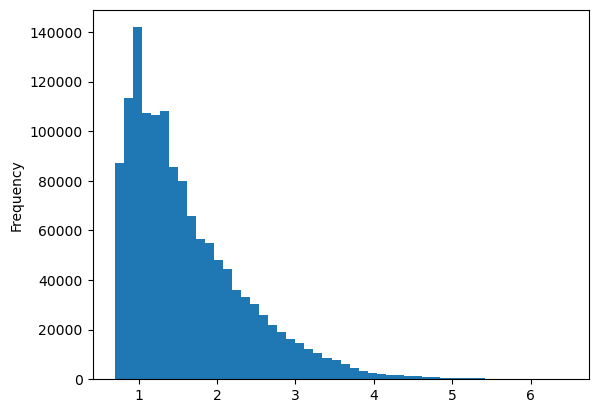

In [114]:
np.log10(ratings['numVotes']).plot.hist(bins=50)

<Axes: ylabel='Frequency'>

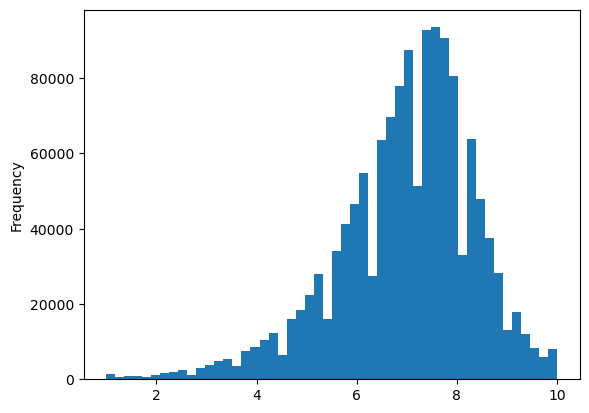

In [115]:
ratings['averageRating'].plot.hist(bins=50)

In [116]:
ratings_50 = ratings[ratings['numVotes']>50]
ratings_50.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2005
1,tt0000002,5.8,269
2,tt0000003,6.5,1907
3,tt0000004,5.5,178
4,tt0000005,6.2,2687


In [117]:
movie_ratings = pd.merge(result_merge, ratings_50, how='left').copy()

In [118]:
movie_ratings

,Movie_name,Movie_box_office_revenu,Movie_genres,Movie_release_year,Wikipedia_movie_ID,originalTitle,tconst,averageRating,numVotes
0,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900,Ghosts of Mars,tt0228333,4.9,56887.0
1,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900,Ghosts of Mars,tt0594845,NaN,NaN
2,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900,Ghosts of Mars,tt2450324,NaN,NaN
3,Getting Away with Murder: The JonBenét Ramsey ...,NaN,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,3196793,NaN,NaN,NaN,NaN
4,Brun bitter,NaN,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,28463795,Brun bitter,tt0094806,NaN,NaN
...,...,...,...,...,...,...,...,...,...
710274,Another Nice Mess,NaN,"{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9971909,Another Nice Mess,tt0362411,5.8,111.0
710275,Another Nice Mess,NaN,"{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9971909,Another Nice Mess,tt12114110,NaN,NaN
710276,The Super Dimension Fortress Macross II: Lover...,NaN,"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,913762,NaN,NaN,NaN,NaN
710277,Spliced,NaN,"{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...",2002,12476867,Spliced,tt1596561,7.0,304.0


In [120]:
# Remove duplicates first based on the 'originalTitle' column
merged_df_no_duplicates = movie_ratings.drop_duplicates(subset='originalTitle', keep='first').copy()

# Filter out rows with NaN in 'averageRating'
filtered_df = merged_df_no_duplicates.dropna(subset=['averageRating'])

# Reset the index of the resulting DataFrame
filtered_df.reset_index(drop=True, inplace=True)

filtered_df

,Movie_name,Movie_box_office_revenu,Movie_genres,Movie_release_year,Wikipedia_movie_ID,originalTitle,tconst,averageRating,numVotes
0,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900,Ghosts of Mars,tt0228333,4.9,56887.0
1,The Sorcerer's Apprentice,NaN,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",2002,18998739,The Sorcerer's Apprentice,tt0048644,6.4,194.0
2,City of the Dead,NaN,"{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur...",1960,2345652,City of the Dead,tt0599746,6.5,299.0
3,Sarah and Son,NaN,"{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an...",1930,175026,Sarah and Son,tt0021335,5.4,299.0
4,The Mechanical Monsters,NaN,"{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""...",NaN,11250635,The Mechanical Monsters,tt0033888,7.4,1607.0
...,...,...,...,...,...,...,...,...,...
38094,Guilty as Sin,22886222.0,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1993,664006,Guilty as Sin,tt0107057,5.7,5743.0
38095,Gopi Kishan,NaN,"{""/m/07s9rl0"": ""Drama"", ""/m/02kdv5l"": ""Action""...",1994,15394941,Gopi Kishan,tt0109922,5.8,964.0
38096,Mermaids: The Body Found,NaN,"{""/m/07s9rl0"": ""Drama""}",2011,35228177,Mermaids: The Body Found,tt1816585,4.6,1711.0
38097,Another Nice Mess,NaN,"{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9971909,Another Nice Mess,tt0362411,5.8,111.0


In [103]:
map_rating = filtered_df[['Wikipedia_movie_ID', 'averageRating']]

In [109]:
map_rating['averageRating'].isna().sum()/map_rating['averageRating'].size

0.0

In [134]:
test_merge = pd.merge(character, filtered_df, how='left', left_on='wiki_movie_id', right_on='Wikipedia_movie_ID')
test_merge

,wiki_movie_id,freebase_movie_id,release_date,character_name,actor_birth_date,actor_gender,actor_height_m,actor_ethnicity_id,actor_name,actor_age_at_release,...,actor_id,Movie_name,Movie_box_office_revenu,Movie_genres,Movie_release_year,Wikipedia_movie_ID,originalTitle,tconst,averageRating,numVotes
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,/m/03wcfv7,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900.0,Ghosts of Mars,tt0228333,4.9,56887.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,/m/0346l4,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900.0,Ghosts of Mars,tt0228333,4.9,56887.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,/m/01vw26l,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900.0,Ghosts of Mars,tt0228333,4.9,56887.0
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,/m/034hyc,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900.0,Ghosts of Mars,tt0228333,4.9,56887.0
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,/m/01y9xg,Ghosts of Mars,14010832.0,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,975900.0,Ghosts of Mars,tt0228333,4.9,56887.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,...,/m/0b_vcv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,...,/m/0bx7_j,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,...,/m/022g44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,...,/m/0g8ngmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
test_merge['averageRating'].isna().sum()/test_merge['averageRating'].size

0.42260062262991244

In [136]:
test_merge['birth_year'] =  pd.to_datetime(test_merge['actor_birth_date'], errors='coerce').dt.year

In [139]:
test_merge['birth_year'] = test_merge['actor_birth_date'].apply(lambda x: int(str(x).split('-')[0]) if not pd.isna(x) else pd.NA)

In [141]:
test_merge.loc[test_merge['birth_year'] > 2023, 'birth_year'] = pd.NA

In [142]:
test_merge.loc[test_merge['birth_year'] < 1800, 'birth_year'] = pd.NA

In [145]:
# Assuming 'Movie_release_year' and 'birth_year' are in string format, you can convert them to integers.
test_merge['Movie_release_year'] = pd.to_numeric(test_merge['Movie_release_year'])

# Now, calculate 'age_at_release' as the difference between 'Movie_release_year' and 'birth_year'.
test_merge['age_at_release'] = test_merge['Movie_release_year'] - test_merge['birth_year']


In [149]:
# Define your age group bins and labels
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['0-17', '18-24', '25-34', '35-49', '50+']

# Use the cut function to create age groups
test_merge['age_group'] = pd.cut(test_merge['age_at_release'], bins=age_bins, labels=age_labels)


array([[<Axes: title={'center': 'age_at_release'}>,
        <Axes: title={'center': 'averageRating'}>]], dtype=object)

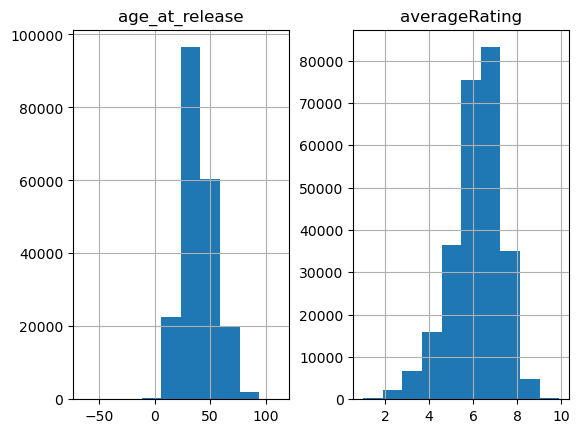

In [150]:
final_df = test_merge[['age_at_release', 'age_group', 'averageRating']]
final_df.hist()

c:\Users\gezas\.conda\envs\ada\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\gezas\.conda\envs\ada\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\gezas\.conda\envs\ada\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


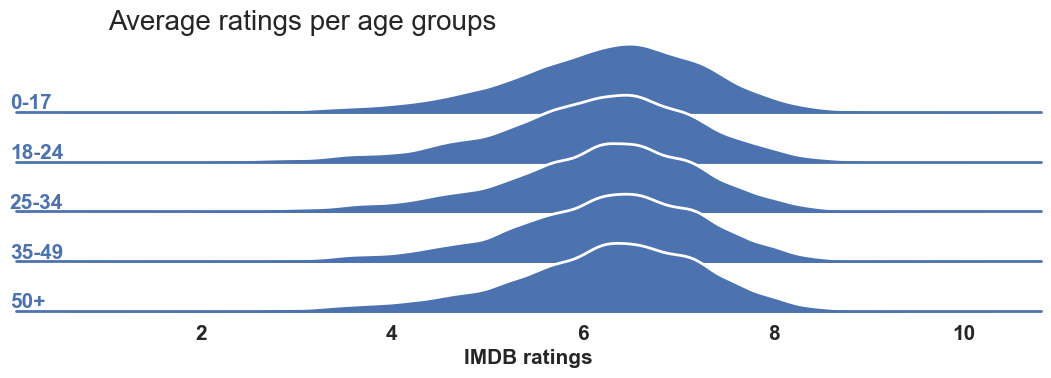

In [158]:
# getting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(final_df, row='age_group', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'averageRating',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'averageRating', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(0, 0.02, age_labels[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    ax.set_ylabel('')
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('IMDB ratings', fontweight='bold', fontsize=15)

g.fig.suptitle('Average ratings per age groups',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()